In [19]:
import matplotlib.pyplot as plt
import numpy as np


from matplotlib.animation import FuncAnimation, PillowWriter 
from IPython.display import HTML

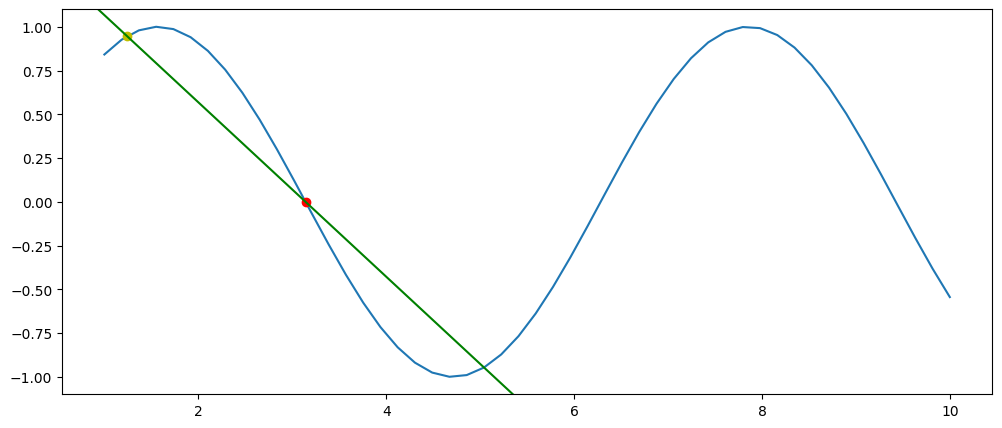

In [47]:
# Definir a figura e um sistema de eixos
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 1, 1)

# Definir a função
f = lambda x: np.sin(x)

# Definir uma sequencia uniforme em x para o gráfico
x = np.linspace(1, 10, 50)

# Construir o gráfico
ax.plot(x, f(x))

# Plotar um ponto x
x1 = np.pi
p1 = (x1, f(x1))
ax.plot(p1[0], p1[1], 'ro')

# Plotar x+h
h = -1.9
p2 = (x1+h, f(x1+h))
ax.plot(p2[0], p2[1], 'yo')

# Plotar secante
ax.axline(xy1=p1, xy2=p2, color='green', linewidth=1.5)

plt.show()

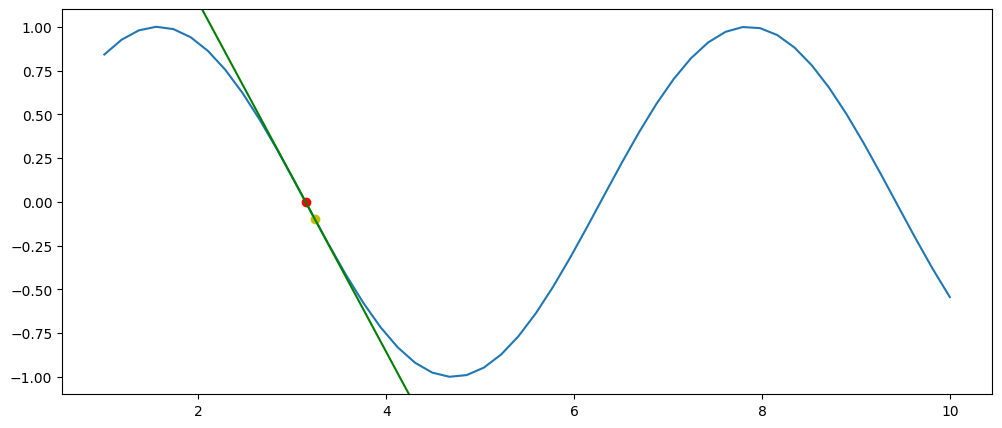

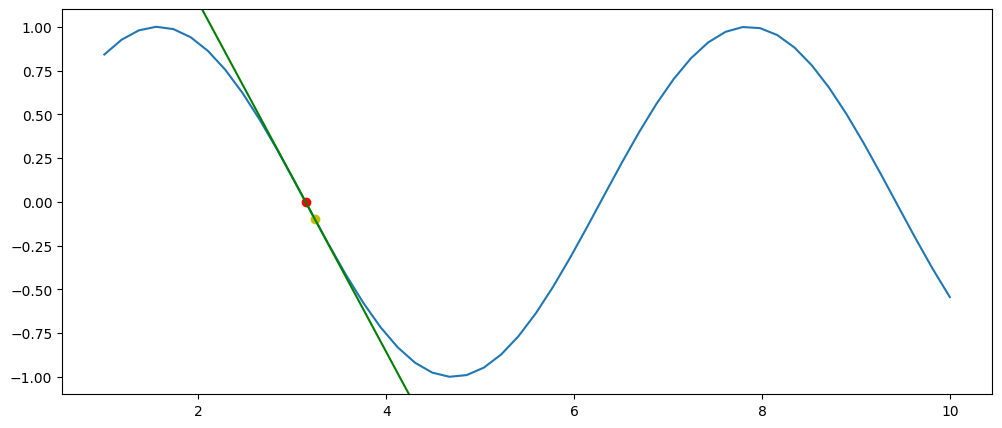

In [25]:
def grafico(h = -1.9, x1 = np.pi):
    # Definir a figura e um sistema de eixos
    fig = plt.figure(figsize=(12, 5))
    ax = plt.subplot(1, 1, 1)

    # Definir a função
    f = lambda x: np.sin(x)

    # Definir uma sequencia uniforme em x para o gráfico
    x = np.linspace(1, 10, 50)

    # Construir o gráfico
    ax.plot(x, f(x))

    # Plotar um ponto x
    # x1 = np.pi
    p1 = (x1, f(x1))
    ax.plot(p1[0], p1[1], 'ro')

    # Plotar x+h
    # h = -1.9
    p2 = (x1+h, f(x1+h))
    ax.plot(p2[0], p2[1], 'yo')

    # Plotar secante
    ax.axline(xy1=p1, xy2=p2, color='green', linewidth=1.5)

    return fig


grafico(h=.1, x1=np.pi)

(<matplotlib.lines.Line2D at 0x25aafbf2740>,
 <matplotlib.lines.AxLine at 0x25aafbcdbd0>)

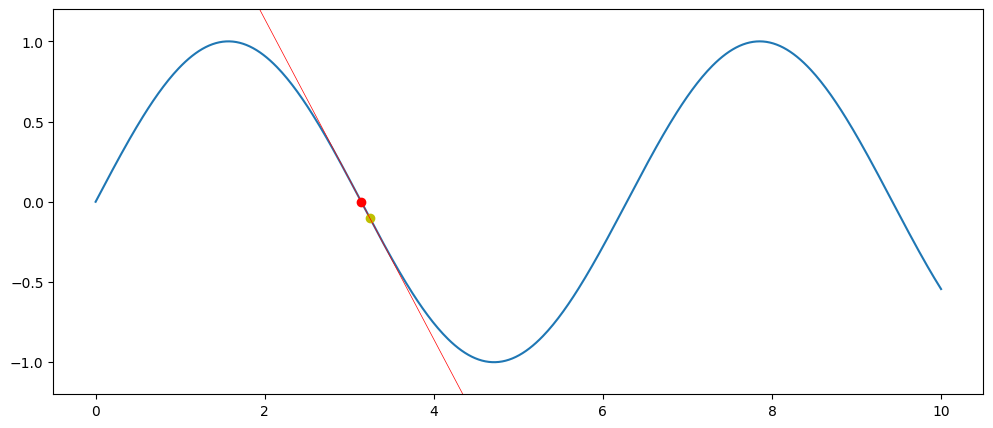

In [46]:
# Definir a figura e um sistema de eixos
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,1,1, ylim = (-1.2, 1.2))   

# Definir a função
f = lambda x: np.sin(x)

# Definir uma sequencia uniforme em x para o nosso gráfico
x = np.linspace(0, 10, 500)
# Calcular f(x) para cada x da sequencia acima
y = f(x)

# Construir o gráfico
ax.plot(x, y, '-')

# Definir dois pontos vazios. Esses pontos vão receber
#      (x, f(x))
#      e (x+h, f(x+h))
x1 =  4.5
p1 = (x1, f(x1))

h = 1
x2 = x1 + h
p2 = (x2, f(x2))

pto1, = ax.plot(p1, 'ro')
pto2, = ax.plot(p2, 'yo')

def linha_ab(delta=1, x1=2):
    x2 = x1 + delta
    y1 = f(x1)
    y2 = f(x2)
    
    pto1.set_data([x1], [y1])
    pto2.set_data([x2], [y2])
    
    # inclinação = (y2-y1)/(x2-x1)
    
    p1 = (x1, f(x1))
    p2 = (x2, f(x2))
    linha = ax.axline(xy1=p1, xy2=p2, color="red", linewidth=.5)

    # linha.set_data([x1, x2], [f(x1),  f(x2)])

    return (pto1, pto2, linha)

  
linha_ab(delta=.1, x1=np.pi)


In [47]:
%%time
n_frames = 100
def desenha_frame(n, num = n_frames, hmax = 1):
    return (linha_ab(delta=hmax - n*hmax/(n_frames+.1)))

anim = FuncAnimation(fig, desenha_frame, frames=n_frames, interval=20, blit=True)
HTML(anim.to_jshtml())

CPU times: total: 18 s
Wall time: 20.2 s
